In [1]:
import pandas as pd
import numpy as np
import rpy2

In [16]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('../data/pitchfork.sqlite')

In [3]:
%load_ext rpy2.ipython

In [4]:
%R library('ggplot2')
%R library(scales)

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



array(['scales', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [5]:
reviews = pd.read_sql('Select * from reviews',conn)

In [6]:
stream_count = pd.read_csv('../data/album_play_counts.csv')

In [7]:
stream_count = stream_count.drop('Unnamed: 0',axis=1)

In [8]:
stream_df = pd.merge(reviews[['artist','title','score']],stream_count,on=['artist','title'])

In [9]:
stream_df['stream_count'] = stream_df.stream_count.astype('int')

In [10]:
stream_df['score_bin'] = pd.cut(stream_df.score, [0,1,2,3,4,5,6,7,8,9,10],right=True, #range will be inclusive on right, e.g. 1-2 is (1-2]
                                labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10'],include_lowest=True)

In [11]:
mean_scores= stream_df.groupby(['score_bin']).mean().reset_index()

In [12]:
%R -i mean_scores

In [13]:
%R names(mean_scores)[3] <- 'avg_streams'

array(['avg_streams'], dtype='<U11')

In [15]:
%R str(mean_scores)

'data.frame':	10 obs. of  3 variables:
 $ score_bin  : Ord.factor w/ 10 levels "0-1"<"1-2"<"2-3"<..: 1 2 3 4 5 6 7 8 9 10
 $ score      : num  0.483 1.759 2.692 3.67 4.68 ...
 $ avg_streams: num  29601963 92474302 64147277 58354851 63868040 ...


In [16]:
%R mean_scores$avg_streams_M <- mean_scores$avg_streams/(10^6)

array([ 29.60196329,  92.47430163,  64.14727665,  58.35485057,
        63.86803958,  35.54547681,  36.98518822,  23.17034703,
        46.75274486, 152.28965747])

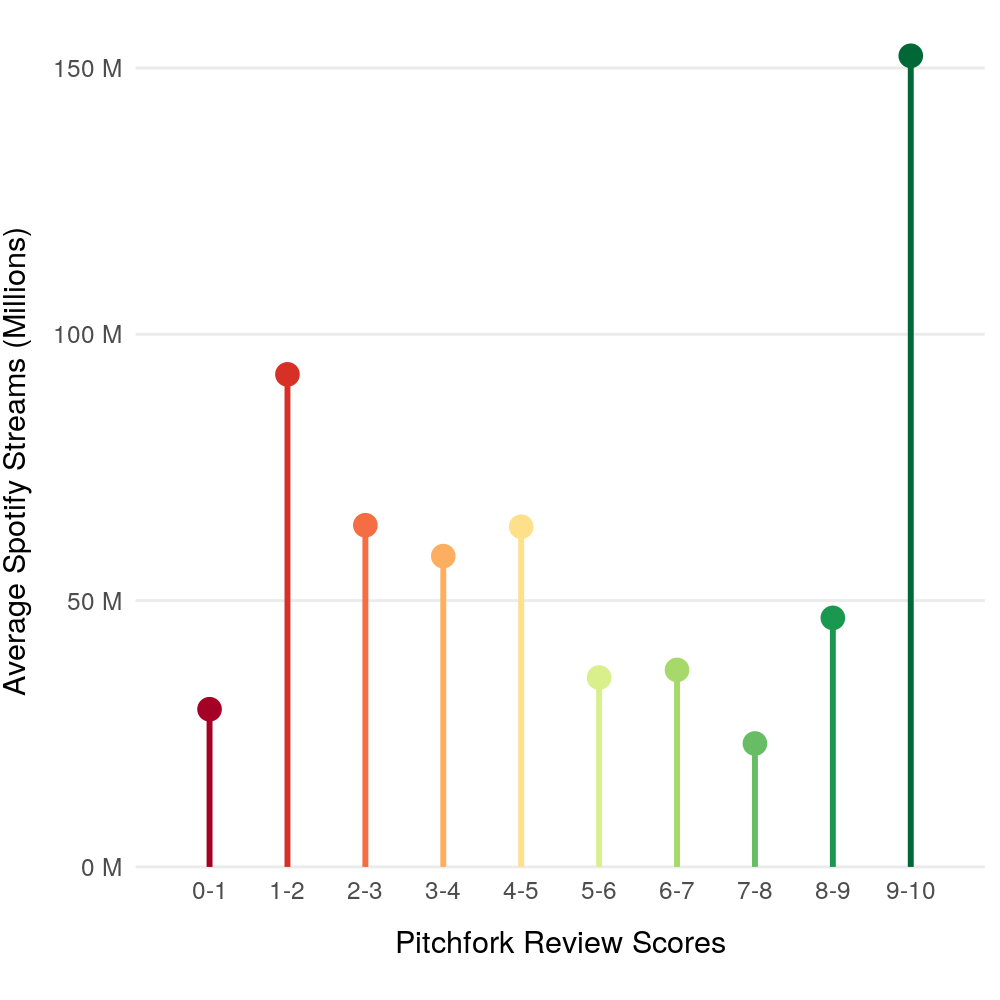

In [56]:
%%R  -w 5 -h 5 --units in -r 200 

lolipop <- ggplot() + 
    geom_segment(aes(x=score_bin,xend=score_bin,y=0,yend=avg_streams_M,color=score_bin),data=mean_scores,size =1) +
    geom_point(aes(x=score_bin,y=avg_streams_M,color=score_bin),data=mean_scores,size=3.5) +
    scale_y_continuous(labels = unit_format(unit = "M")) +
    scale_x_discrete(expand = c(0.05, 0.5)) +
    scale_color_brewer(palette='RdYlGn') +
    theme_minimal() +
    theme(panel.grid.minor.y=element_blank(),panel.grid.major.x=element_blank(), axis.text.x=element_text(vjust=6)) +
    guides(color=FALSE) +
    ylab('Average Spotify Streams (Millions)') +
    xlab('Pitchfork Review Scores') + 
    theme(axis.title.y=element_text(vjust=2.5),axis.title.x=element_text(vjust=4))
    
print(lolipop)

In [58]:
%R ggsave(lolipop,file='lolipop_final.png', device=png(width = 5.5, height = 5.5, units = "in", res=300))

R[write to console]: Saving 5.5 x 5.5 in image

